In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
path = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

dataset = pd.read_csv(path)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
dataset.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data = dataset["Passengers"]
data = np.array(data).reshape(-1,1)
data.shape

(144, 1)

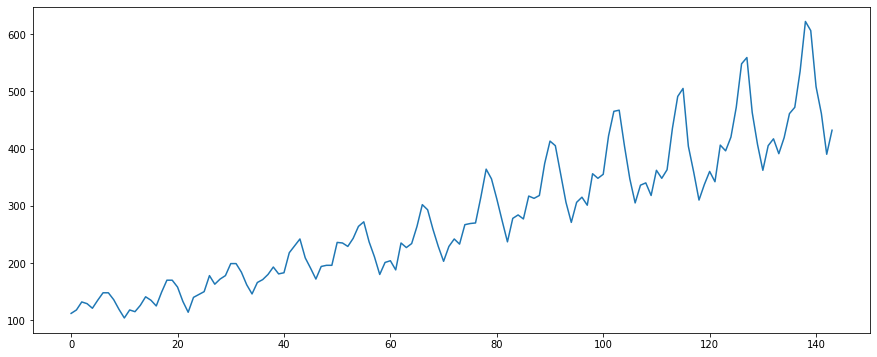

In [6]:
plt.figure(figsize = (15,6))
plt.plot(data)
#dataset["Passengers"].plot()
plt.show()

In [7]:
scaler = MinMaxScaler(feature_range= (0,1))

data = scaler.fit_transform(data)
data.min(),data.max()

(0.0, 1.0)

In [8]:
train_size = 100
test_size = 44

In [9]:
train = data[0:train_size, :]
train.shape

(100, 1)

In [10]:
test = data[train_size: , : ]
test.shape

(44, 1)

In [11]:
data.shape

(144, 1)

In [12]:
# Build Training an Testing Dataset

def get_data(dataframe, look_back):

    dataX, dataY = [], []

    # En son değeri dahil etmiyorum
    for i in range(len(dataframe)-look_back-1):
        a = dataframe[i : (i + look_back), 0]
        
        dataX.append(a)
        dataY.append(dataframe[i+look_back,0])
        

    return np.array(dataX), np.array(dataY)

In [13]:
deneme = np.array([1,2,3,4,5]).reshape(-1,1)
print(deneme.shape)

x, y = get_data(deneme , look_back = 1)

(5, 1)


In [14]:
x.shape, y.shape

((3, 1), (3,))

In [15]:
x,y

(array([[1],
        [2],
        [3]]), array([2, 3, 4]))

In [16]:
X_test, y_test = get_data(test, look_back = 1)
X_train, y_train = get_data(train, look_back = 1)

In [17]:
test[-4:-1]

array([[0.77992278],
       [0.68918919],
       [0.55212355]])

In [18]:
X_train.shape , X_test.shape

((98, 1), (42, 1))

In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [20]:
# Build The Model 
look_back = 1

model = Sequential()

model.add(LSTM(units = 5, input_shape = (1, look_back)))
model.add(Dense(1))

model.compile(loss = "mean_squared_error", optimizer = "adam")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), batch_size = 1)

Epoch 1/50
98/98 [==============================] - 2s 6ms/step - loss: 0.0347 - val_loss: 0.1832
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.1208
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0122 - val_loss: 0.0990
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.0849
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0715
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0630
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0542
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0446
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0371
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0320
Epoch 11/50
98/98 [

In [22]:
scaler.scale_

array([0.0019305])

In [23]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_pred[:5]

array([[346.4299 ],
       [411.13068],
       [451.13477],
       [452.95844],
       [393.9849 ]], dtype=float32)

In [24]:
y_test_inverse = np.array(y_test)
y_test_inverse = y_test_inverse.reshape(-1,1)
y_test_inverse = scaler.inverse_transform(y_test_inverse)
y_test_inverse[:5]

array([[422.],
       [465.],
       [467.],
       [404.],
       [347.]])

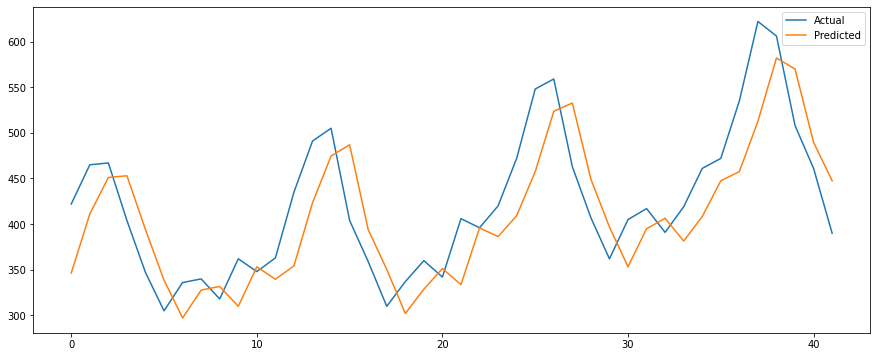

In [25]:
plt.figure(figsize = (15,6))
plt.plot(y_test_inverse,label = "Actual")
plt.plot(y_pred, label = "Predicted")
plt.legend(loc = "best")
plt.show()